In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [35]:
gray_levels = np.array(range(0,6))
max_gray_level = gray_levels[5]
min_gray_level = gray_levels[0]
min_gray_level,max_gray_level

(0, 5)

In [36]:
def DrawTable(mat, normalized=False):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    colors = plt.cm.binary_r(np.linspace(0, 1, max_gray_level+1))
    tb = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = mat.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(mat):
        if normalized:
            index = int(round(mat[i][j]*max_gray_level,0))
            #print(f'index = {index}')
        else:
            index = mat[i][j]
        tb.add_cell(i, j, width, height, text=round(val,1),loc='center', facecolor=colors[index])
        tb._cells[(i, j)]._text.set_color(colors[~index])
        tb._cells[(i, j)]._text.set_fontsize(14)

    ax.add_table(tb)
    plt.show()
    

In [39]:
def GetTestArray():
    return np.array([0,0,0,5,4,0,0,3,3,2,0,5,5,0,0,4,4,4,0,0,3,5,1,1,0]).reshape(max_gray_level,max_gray_level)

In [119]:
def GetPixelCount(PrintVal=False):
    from collections import Counter
    pixel_dict = Counter(GetTestArray().flatten())
    if PrintVal:
        print('GrayLevel \t count')
        for val in  gray_levels:
            print(f'  {val} \t \t  {pixel_dict[val]}')
    return pixel_dict

In [62]:
def Threshold(k=0,normalized=False):
    test = GetTestArray()
    if k > 0:
        for (i,j), val in np.ndenumerate(test):
            if test[i][j] >= k:
                test[i][j] = max_gray_level
            else:
                test[i][j] = min_gray_level
    if normalized:
        norm_test = test/max_gray_level
        DrawTable(norm_test,normalized=True)
    else:
        DrawTable(test)

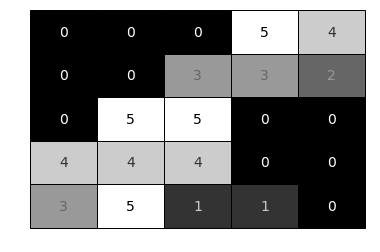

Counter({0: 11, 5: 4, 4: 4, 3: 3, 2: 1, 1: 2})

In [66]:
Threshold()


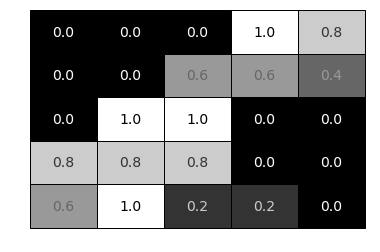

In [42]:
Threshold(normalized=True)

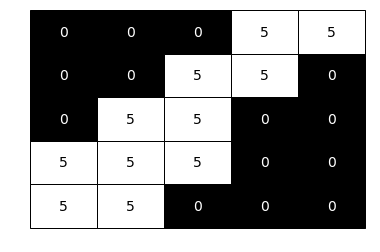

In [43]:
Threshold(3)

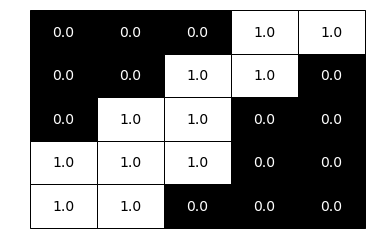

In [27]:
Threshold(3,True)

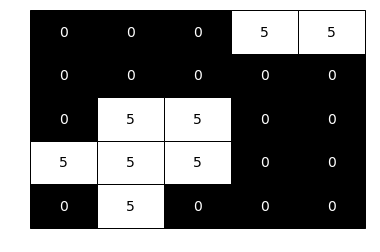

In [28]:
Threshold(4)

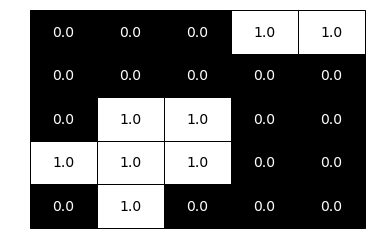

In [29]:
Threshold(4,True)

In [83]:
GetPixelCount()

Counter({0: 11, 5: 4, 4: 4, 3: 3, 2: 1, 1: 2})

In [82]:
GetPixelCount(PrintVal=True)

GrayLevel 	 count
  0 	 	  11
  1 	 	  2
  2 	 	  1
  3 	 	  3
  4 	 	  4
  5 	 	  4


Counter({0: 11, 5: 4, 4: 4, 3: 3, 2: 1, 1: 2})

In [100]:
def GetProbabilityDistribution(PrintVal=False):
    from collections import Counter
    test = GetTestArray()
    pixel_dict = Counter(test.flatten())
    prob_dict = {}
    if PrintVal:
        print('GrayLevel \t Probability')
    for val in  gray_levels:
        prob = pixel_dict[val]/(test.shape[0]*test.shape[1])
        prob_dict[val] = prob
        if PrintVal:
            print(f'  {val} \t \t  {prob}')
    return prob_dict

In [102]:
GetProbabilityDistribution(PrintVal=True)
#GetProbabilityDistribution()

GrayLevel 	 Probability
  0 	 	  0.44
  1 	 	  0.08
  2 	 	  0.04
  3 	 	  0.12
  4 	 	  0.16
  5 	 	  0.16


{0: 0.44, 1: 0.08, 2: 0.04, 3: 0.12, 4: 0.16, 5: 0.16}

Now let us prove the following equation
$$\large p_i = \frac{n_i}{N}, \space p_i \geq 0, \space \sum_{i=1}^L p_i = 1 \longrightarrow (1)$$

In [118]:
key, prob = zip(*GetProbabilityDistribution().items())
prob = list(prob)
print(f'prob = {prob}')
print(f'sum of prob = {sum(prob)}')

prob = [0.44, 0.08, 0.04, 0.12, 0.16, 0.16]
sum of prob = 1.0
